In [14]:
# Packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

Parameters

In [15]:
Machine='/glade/campaign/cgd/amp/andrew/'

#path
#pth1='/perm/rd/vsag/scm/41r1/scm-mg/scm-run/'
pth1=Machine+'ecmwf/cases/'

pth2=pth1

iopnew=['stratocu','sctranfast','TWPICE','MPACE','MICRE10d','MICRE']
iopi=5
iopn=iopnew[iopi]

#make 2 cases, can be refIFS or MG3 type

#46r1
extxt=['refifsbudget2_T8rlx','s22in5_radarsim5melts2ss_T8rlx']

casen=['RefIFS','MG3']
microtype=['ifs','mg3']


#extxt=['mg3v46_s22in5_melts2_T8rlx','mg3v46_s22in5_T8rlx']
#casen=['MELTSmod','MG3']
#microtype=['mg3','mg3']
sectxt=['225','225']


# Two MG3 cases
#extxt=['mg3v46_s18in5_vapdeps7','mg3v46_s18in5_vdeps7_icemacro']
#extxt=['mg3v46_s19in5_radfix_nimax','mg3v46_s20in5_fixN']
#extxt=['mg3v46_s20in5','mg3v46_s20in5_ccn1']
#casen=['MG3','MG3-ccn1']
#microtype=['mg3','mg3']
#sectxt=['900','900']

case2=extxt[1]

newpth1=pth1+'scmout_'+iopn+'_'+extxt[0]+'_'+sectxt[0]+'s/'
newpth2=pth1+'scmout_'+iopn+'_'+extxt[1]+'_'+sectxt[1]+'s/'

#Titles for plots
text1=casen[0]
text2=casen[1]

In [16]:
# Set Cases

#typ='cam6'
#graupel='N'
mg3dim_names=['nlev','time']
mg3file=newpth2+'MG_tend.nc'
dsp = xr.open_dataset(mg3file,decode_times=False)
press=dsp['pressure_f'].mean(dim='time')

Set File Names

In [17]:
opth1=newpth1[0]

if (microtype[0]== 'mg3'):
    infile1=newpth1+'MG_tend.nc'
    dim_names=['nlev','time']
else:
    infile1=newpth1+'diagtend_hydromass.nc'
    dim_names=['nlev','time']

if (len(case2) > 2):
    opth2=newpth2
    if (microtype[1] == 'mg3'): 
        infile2=newpth2+'MG_tend.nc'
        dim_names=['nlev','time']
    else:
        infile2=newpth2+'diagtend_hydromass.nc'
        dim_names=['nlev','time']

In [18]:
#common plot setup

yrg=[1000,100.]
dy=40.
if (iopn == 'stratocu' or iopn == 'MPACE' or iopn == 'sctranfast'):
    yrg=[1000,800.]
    dy=5
        
ytl='Pressure (hPa)'

ypos=980.-np.arange(17,dtype='float')*dy
secdy=86400.  #(convert into days)
ln=[0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2]  #linestyle
lntx=['____','. . . .','_ _ _','____','. . . .','_ _ _','____','. . . .','_ _ _',
      '____','. . . .','_ _ _','____','. . . .','_ _ _','____','. . . .','_ _ _',
      '____','. . . .','_ _ _']

xtl=r'g kg$^{-1}$ day$^{-1}$'
scl=1000.

lns = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-']
lbl = ['A) ','B) ','C) ','D) ']
# Make a list of color names....
#import matplotlib.colors as mcolors
#names = list(mcolors.BASE_COLORS)
#cls = names + names
cls=['b', 'g', 'r', 'c', 'm', 'y', 'k','b','teal','aqua','b','g', 'r', 'c', 'm', 'y', 'k','teal','aqua']

In [19]:
# Now set to loop over sets.

In [20]:
#5. Microphys liq detail
#6. Microphys Ice Detail

#7: Rain Tend     
#8: Snow tend     
#9: Graupel Tend  # Not coded from IDL yet



5
6


### Combine into one big Cell...
Liq & Ice
Rain & Snow

Liquid
Ice


<Figure size 432x288 with 0 Axes>

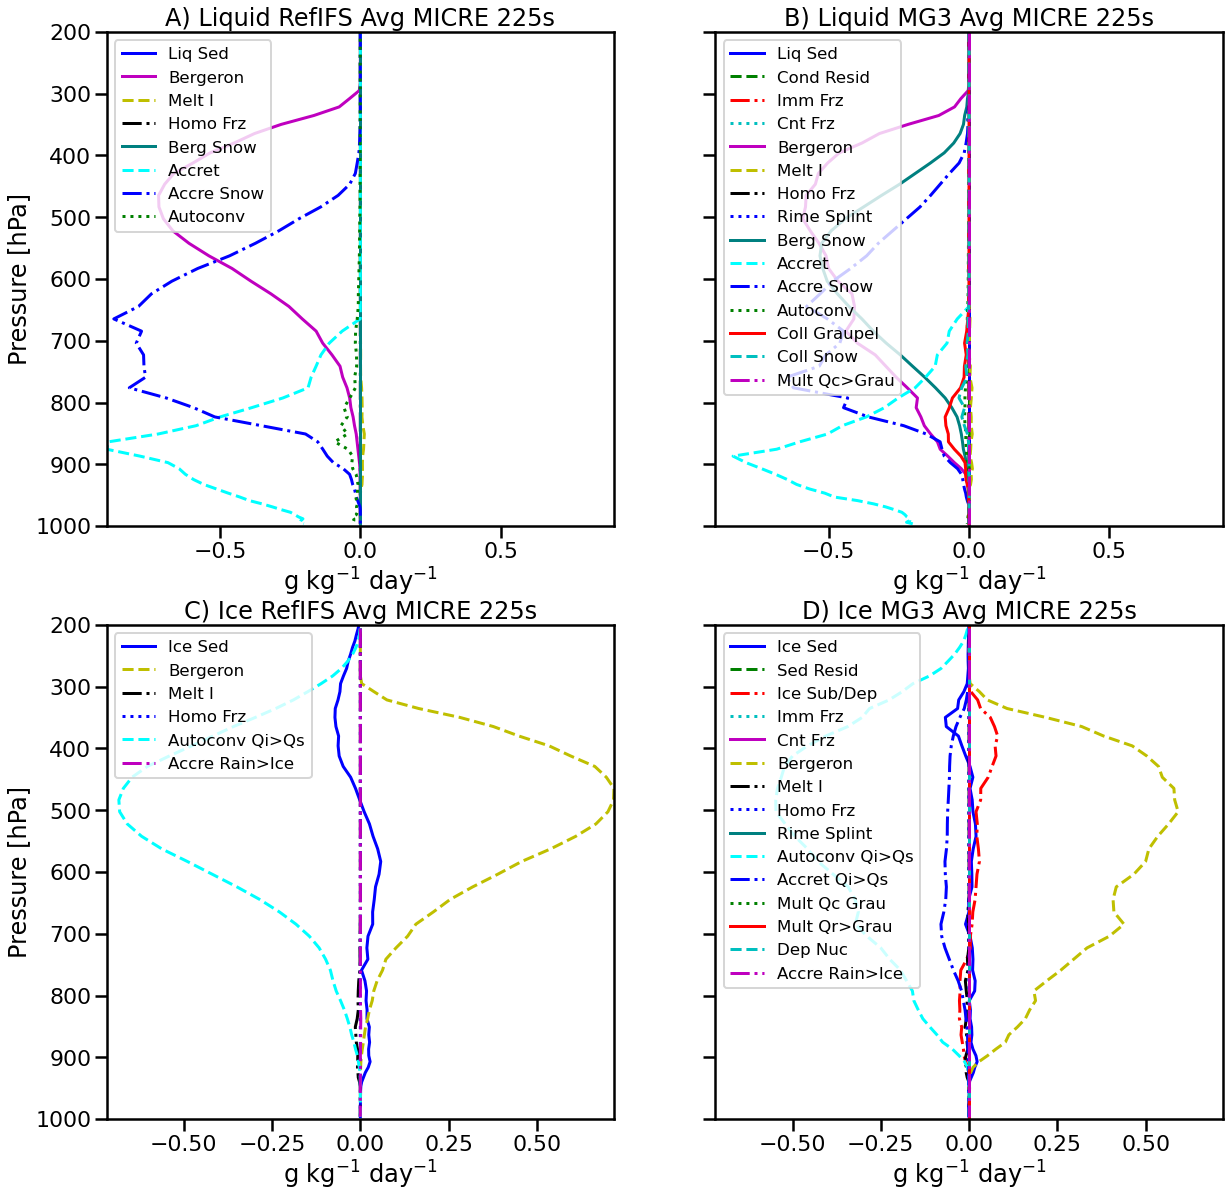

In [34]:
figsav=True

## Modify these lines to select different multiple sets (think it only works for ds>=2)
s0=5 #first hydrometeor
ds=2 # number of hydrometeors
setsn='LiqIce' # File name




ns=0 # counter for hydrometeors (rows)

sns.set_context("poster")

yrg=[1000,200.]

plt.tight_layout()

fig,axs=plt.subplots(nrows=ds,ncols=2,sharey=True, figsize=[20,10*ds])

for s in range(s0,s0+ds):
#Liquid
    if (s == 5):
        setn='Liquid'
#    if (microtype[0]=='mg3'):
        mgvars=  ['QCSEDTEN','QCRESO'   ,'MNUCCCO','MNUCCTO','BERGO'   ,'MELTO'  ,'HOMOO'   ,'MSACWIO'    , 'BERGSO'   ,'PRAO' ,'PSACWSO'    , 'PRCO'     ,'PSACWG'      ,'PGSACW','QMULTG']
        ifsvars =['ql_sedim',''        ,''      ,''  ,'qiql_berg','qrqi_melt','qiql_homfrz',''   , 'qsqv_depsed' ,'qrql_accr','qsql_accr', 'qrql_auto' ,''      ,'','']
        mgvaru=['kg/kg/s' ,'kg/kg/s'  ,'kg/kg/s','kg/kg/s','kg/kg/s' ,'kg/kg/s','kg/kg/s' ,'kg/kg/s'    ,'kg/kg/s' ,'kg/kg/s','kg/kg/s'   ,'kg/kg/s'   ,'kg/kg/s'      ,'kg/kg/s','kg/kg/s']
        mgvarn=['Liq Sed' ,'Cond Resid','Imm Frz','Cnt Frz','Bergeron','Melt I' ,'Homo Frz','Rime Splint','Berg Snow' ,'Accret','Accre Snow','Autoconv', 'Coll Graupel','Coll Snow','Mult Qc>Grau'] 
        mgctmp=[1.        ,1.         ,-1.       ,-1.     ,-1.       ,1.       ,-1.       ,-1.           ,-1.        ,-1       ,-1          ,-1          , -1            , -1,  -1]
    if (s==6):
        setn='Ice'   
#    if (microtype[0]=='mg3'):   
        mgvars= ['QISEDTEN','QIRESO'   ,'CMEIOUT' ,'MNUCCCO','MNUCCTO','BERGO'   ,'MELTO'  ,'HOMOO'    ,'MSACWIO'    ,'PRCIO'   ,'PRAIO', 'QMULTG'       ,'QMULTRGO'    ,'MNUDEP','MNUCCRIO'] 
        ifsvars=['qi_sedim',''          ,''       ,'',      '',       'qiql_berg' ,'qrqi_melt','qiql_homfrz'   ,''    ,'qsqi_auto'   ,'', '' ,           ''    ,'qiqv_deposition','qsqr_frz'] 
        mgvaru=['kg/kg/s' ,'kg/kg/s'  ,'kg/kg/s' ,'kg/kg/s','kg/kg/s','kg/kg/s','kg/kg/s' ,'kg/kg/s' ,'kg/kg/s'    ,'kg/kg/s','kg/kg/s', 'kg/kg/s'     ,'kg/kg/s'     ,'kg/kg/s','kg/kg/s'] 
        mgvarn=['Ice Sed' ,'Sed Resid','Ice Sub/Dep','Imm Frz','Cnt Frz','Bergeron','Melt I' ,'Homo Frz','Rime Splint','Autoconv Qi>Qs','Accret Qi>Qs', 'Mult Qc Grau','Mult Qr>Grau','Dep Nuc','Accre Rain>Ice']
        mgctmp=[1.        ,1.         ,1.        ,1.       ,1.       ,1.        ,-1.       ,1         ,1            ,-1       ,-1      ,1              , 1            ,1,1]
# Remove 'qiqv_deposition' (deposition nucleation), from IFS budget: cloud scheme does it, not microphysics
        ifsvars[13]=''
    if (s==7):
# -MNUCCRIO. (accretion of rain to ice)
        setn='Rain'    
        mgvars =['QRSEDTEN','PRAO'     ,'PRCO'     ,'PRACSO'    ,'MNUCCRO'         ,'QMULTRGO'    ,'PRACGO'       ,'PGRACSO',           'MNUCCRIO'      , 'EVAPPREC','MELTSTOT']
        ifsvars=['qr_sedim','qrql_accr','qrql_auto','qsqr_accr' ,'qsqr_frz'        ,''            ,''             ,''    ,           'qsqr_frz'        , 'qvqr_evap','qrqs_melt']
        mgvaru=['kg/kg/s' ,'kg/kg/s' ,'kg/kg/s' ,'kg/kg/s'   ,'kg/kg/s'        ,'kg/kg/s'     ,'kg/kg/s'      ,'kg/kg/s'           ,'kg/kg/s'       , 'kg/kg/s' , 'kg/kg/s' ]
        mgvarn=['QR SED'  ,'Accre'   ,'Auto'   ,'Accre Rain','Frz Rain > Snow','Mult Qr>Grau','Coll Qr> Grau','Coll Qr by Qs>Grau','Accre Rain>Ice','Evap Rain', 'Melt Snow']
        mgctmp=[1.        ,1.        ,1         ,-1.         ,-1               ,-1            ,-1             ,-1                  ,-1.             , -1.,       1.] 
    if (s==8):
        setn='Snow'    
#MG3
        mgvars =['QSSEDTEN','PRACSO'      ,'MNUCCRO'          ,'BERGSO'     ,'PSACWSO'   ,'EVAPSNOW'   ,'PRCIO'         ,'PRAIO'      ,'PRACSO'     ,'PSACRO'    ,'MELTSTOT' ,'VAPDEPSO']
        ifsvars=['qs_sedim','qsqr_accr'   ,'qsqr_frz'         ,'qsqv_depsed','qsql_accr' ,'qvqs_subsed','qsqi_auto'     ,''           ,'qsqr_accr'  ,''          ,'qrqs_melt','' ]
        mgvaru=['kg/kg/s' ,'kg/kg/s'     ,'kg/kg/s'           ,'kg/kg/s'    ,'kg/kg/s'   ,'kg/kg/s'    ,'kg/kg/s'       ,'kg/kg/s'    ,'kg/kg/s'    ,'kg/kg/s'   ,'kg/kg/s'  ,'kg/kg/s' ]
        mgvarn=['QS SED'  ,'Accrete Rain','Freeze Rain > Snow','Berg > Snow','Accret Liq','Evap'       ,'Autoconv Qi>Qs','Accre Qi>Qs','Accre Qr>Qs','Qg coll Qs','Melt Qs'  ,'Vap Dep Snow']
        mgctmp=[1.        ,-1.           ,1.                  ,1.          ,1.         ,-1.            ,1               ,1            ,1            ,-1          ,-1         ,1]      
    if (s==9):
        setn='Graupel'
#MG3
        mgvars=['QGSEDTEN' ,'PRACGO'    ,'PGRACSO'   ,'PRDGO'  ,'PSACRO'    ,'MNUCCRO'     ,'PSACWG'   ,'PGSACW'     ,'MELTGTOT']
        mgvaru=['kg/kg/s'  ,'kg/kg/s'   ,'kg/kg/s'   ,'kg/kg/s','kg/kg/s'   ,'kg/kg/s'     ,'kg/kg/s'   ,'kg/kg/s'   ,'kg/kg/s'   ]
        mgvarn=['Graup Sed','Coll Qr>Qg','Coll Qr>Qs','Qg Dep' ,'Coll Qs>Qr','Freeze Qr>Qg','Coll Qc>Qg','Coll Qc>Qs','Melt Qg']
        mgctmp=[1.        ,1.           ,1.          ,1        ,1.          ,1.            ,1.          ,1           ,-1]
        ifsvars = ["" for i in range(mgnv)]
 #Copy over IFS fields...
    mgnv=len(mgvarn)
    mgvarc=np.array(mgctmp)*secdy
    ifsvars = ["tend2_" + ifsvars for ifsvars in ifsvars]

#IFS data
    ifsnv=len(ifsvars)
    ifsvaru = ['kg/kg/s' for i in range(ifsnv)]
    ifsvarn = mgvarn
    ifsvarc = np.array(mgctmp)*secdy

    print(setn)
    
#now set the different run variables

#first case
    if (microtype[0]=='mg3'):    #MG3
        vars1=mgvars
        varu1=mgvaru
        varn1=mgvarn
        varc1=mgvarc
        nv1=mgnv
    else:                        #refIFS
        vars1=ifsvars
        varu1=ifsvaru
        varn1=ifsvarn
        varc1=ifsvarc
        nv1=ifsnv        

#second case
    if (len(case2) > 2):
        if (microtype[1]=='mg3'):    #MG3
            vars2=mgvars
            varu2=mgvaru
            varn2=mgvarn
            varc2=mgvarc
            nv2=mgnv
        else:                        #refIFS
            vars2=ifsvars
            varu2=ifsvaru
            varn2=ifsvarn
            varc2=ifsvarc
            nv2=ifsnv  

#Open Datasets
#read data
    ds1 = xr.open_dataset(infile1,decode_times=False)
    if (len(case2) > 2):
        ds2 = xr.open_dataset(infile2)
        nz2=len(ds2.nlev)

    nt=len(ds1.time)
    nz1=len(ds1.nlev)

#loop over variables and average in time
    apro1=np.zeros((nv1,nz1),dtype='float')

    for v in range(nv1):   
        if (vars1[v]!= 'tend2_'):
            apro1[v,:]=ds1[vars1[v]].mean(dim='time')
        
    if (len(case2) > 2):
        apro2=np.zeros((nv2,nz2),dtype='float')
        for v in range(nv2): 
            if (vars2[v]!= 'tend2_'):
                apro2[v,:]=ds2[vars2[v]].mean(dim='time')

#Set plot range
    

    tmp1=np.abs(apro1).max()*varc1.max()

    if (len(case2) > 2):
        tmp2=np.abs(apro2).max()*varc2.max()
        tmp=np.max([tmp1,tmp2])
    else:
        tmp=tmp1

    xrg=np.array([-tmp,tmp])*scl

# Plot

    for v in range(nv1):
        if (vars1[v]!= 'tend2_'):
            axs[ns,0].plot(apro1[v,:]*varc1[v]*scl,press/100.,linestyle=lns[v],label=varn1[v],color=cls[v])

    tl=lbl[0+2*ns]+setn+' '+text1+' Avg '+iopn+' '+sectxt[0]+'s'
    
    axs[ns,0].set_ylim(yrg)
    axs[ns,0].set_xlim(xrg)
    axs[ns,0].set_title(tl)
    axs[ns,0].set_ylabel('Pressure [hPa]')
    axs[ns,0].set_xlabel(xtl)
    axs[ns,0].legend(loc='upper left',fontsize='x-small')

# Second run

    for v in range(nv2):
        if (vars2[v]!= 'tend2_'):
            axs[ns,1].plot(apro2[v,:]*varc2[v]*scl,press/100.,linestyle=lns[v],label=varn2[v],color=cls[v])

    tl=lbl[1+2*ns]+setn+' '+text2+' Avg '+iopn+' '+sectxt[1]+'s'
    
    axs[ns,1].set_ylim(yrg)
    axs[ns,1].set_xlim(xrg)
    axs[ns,1].set_title(tl)
    axs[ns,1].set_xlabel(xtl)
    axs[ns,1].legend(loc='upper left',fontsize='x-small')
    
    ns=ns+1 #increment hydrometeor counter

if figsav:
    plt.savefig('S22-T8_'+setsn+'_profile_225s.pdf')



### Old Plot Single Variable

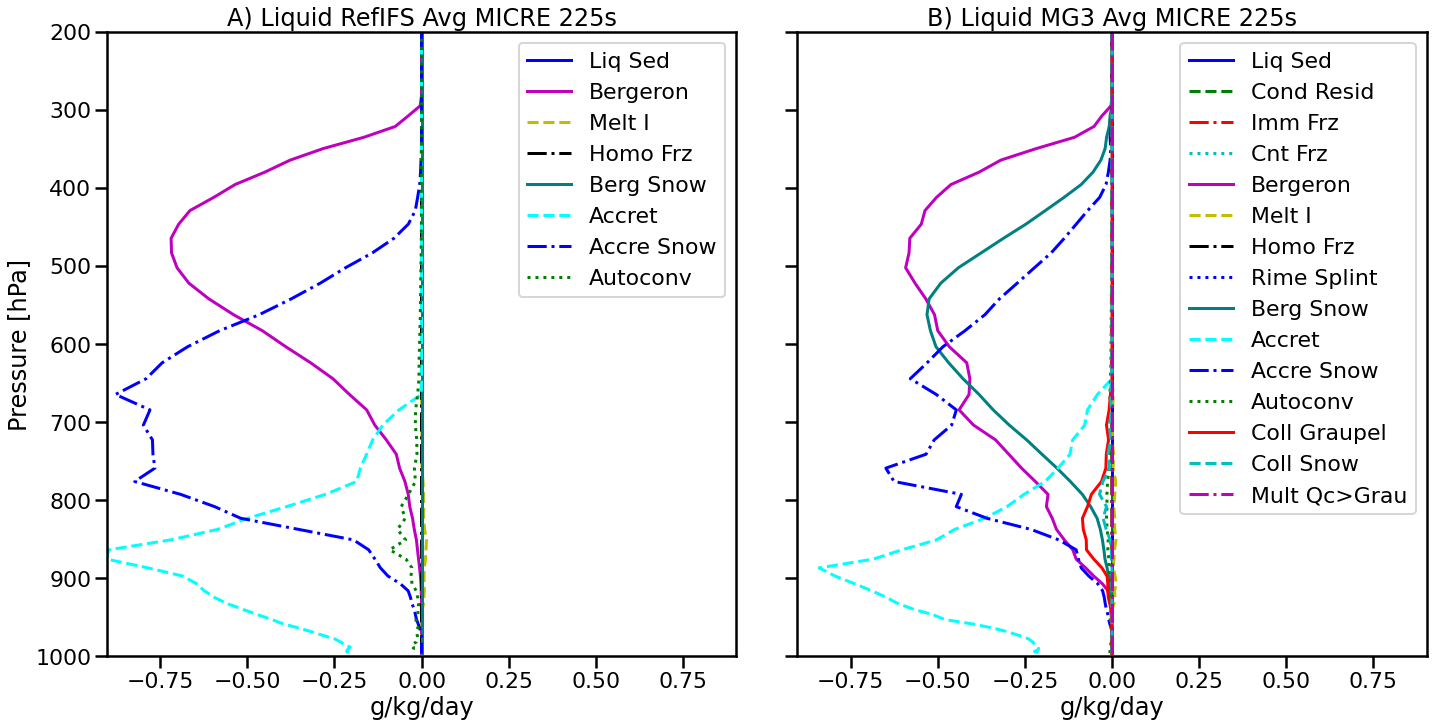

In [188]:
fig,axs=plt.subplots(nrows=1,ncols=2,sharey=True, figsize=[20,10])
sns.set_context("poster")

yrg=[1000,200.]

plt.tight_layout()

for v in range(nv1):
    if (vars1[v]!= 'tend2_'):
        axs[0].plot(apro1[v,:]*varc1[v]*scl,press/100.,linestyle=lns[v],label=varn1[v],color=cls[v])

tl=lbl[0]+setn+' '+text1+' Avg '+iopn+' '+sectxt[0]+'s'
    
axs[0].set_ylim(yrg)
axs[0].set_xlim(xrg)
axs[0].set_title(tl)
axs[0].set_ylabel('Pressure [hPa]')
axs[0].set_xlabel(xtl)
axs[0].legend()

# Second run

for v in range(nv2):
    if (vars2[v]!= 'tend2_'):
        axs[1].plot(apro2[v,:]*varc2[v]*scl,press/100.,linestyle=lns[v],label=varn2[v],color=cls[v])

tl=lbl[1]+setn+' '+text2+' Avg '+iopn+' '+sectxt[1]+'s'
    
axs[1].set_ylim(yrg)
axs[1].set_xlim(xrg)
axs[1].set_title(tl)
axs[1].set_xlabel(xtl)
axs[1].legend()

if figsav:
    plt.savefig('S22-T8_'+iopn+'_'+setn+'_profile_225sV6.pdf')

In [108]:
nv2

11

(1000.0, 100.0)

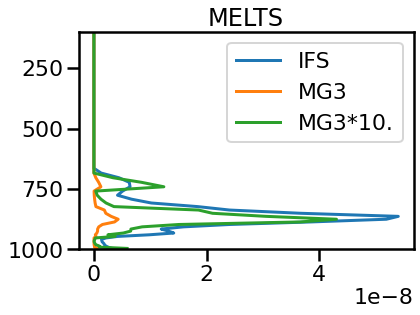

In [225]:
#Noodling with snow melting...MG3*10 = IFS? 

plt.plot(ds1.tend2_qrqs_melt.mean(dim='time'),press/100.,label='IFS')
plt.plot(ds2.MELTSTOT.mean(dim='time'),press/100.,label='MG3')
plt.plot(ds2.MELTSTOT.mean(dim='time')*10.,press/100.,label='MG3*10.')
plt.legend()
plt.title('MELTS')
plt.ylim([1000,100.])

(1000.0, 100.0)

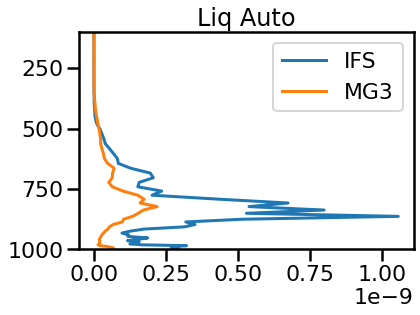

In [220]:
plt.plot(ds1.tend2_qrql_auto.mean(dim='time'),press/100.,label='IFS')
plt.plot(ds2.PRCO.mean(dim='time'),press/100.,label='MG3')
plt.legend()
plt.title('Liq Auto')
plt.ylim([1000,100.])

In [226]:
ds1

<xarray.Dataset>
Dimensions:                  (nlev: 137, nlevp1: 138, nlevs: 4, norg: 4, ntiles: 9, time: 34561)
Coordinates:
  * nlev                     (nlev) int32 1 2 3 4 5 6 ... 133 134 135 136 137
  * nlevp1                   (nlevp1) int32 1 2 3 4 5 6 ... 134 135 136 137 138
  * nlevs                    (nlevs) int32 1 2 3 4
  * ntiles                   (ntiles) int32 -2147483647 ... -2147483647
  * norg                     (norg) int32 -2147483647 ... -2147483647
  * time                     (time) float32 0.0 225.0 ... 7.776e+06 7.776e+06
Data variables: (12/49)
    tend1_ql_dyn             (time, nlev) float32 ...
    tend1_qi_dyn             (time, nlev) float32 ...
    tend1_qr_dyn             (time, nlev) float32 ...
    tend1_qs_dyn             (time, nlev) float32 ...
    tend1_ql_turb            (time, nlev) float32 ...
    tend1_qi_turb            (time, nlev) float32 ...
    ...                       ...
    tend2_qiqv_depsed        (time, nlev) float32 ...
    tend2_qsqv_depsed        (time, nlev) float32 ...
    tend2_ql_sedim           (time, nlev) float32 ...
    tend2_qr_sedim           (time, nlev) float32 0.0 0.0 ... 5.04e-09 2.644e-09
    tend2_qi_sedim           (time, nlev) float32 ...
    tend2_qs_sedim           (time, nlev) float32 ...
Attributes:
    title:         SCM: 46r1  Sim: TWPICE
    modelID:       46r1
    simulationID:  TWPICE
    dataID:        SCM_OUTPUT
    start_day:     20170100
    start_hour:    0

In [79]:
# Testing
#for v in range(nv2):
#    plt.plot(apro2[v,:]*varc2[v]*scl,press/100.,linestyle=lns[v],label=varn2[v])
#    tmp=apro2[v,:]*varc2[v]*scl
#    print(varn2[v],tmp.min())
#yrg=[1000.,100.]
#plt.ylim(yrg)
##v=9
##tmp=apro2[v,:]*varc2[v]*scl
##ds2.EVAPPREC.max()

Read Cloud type variable

In [133]:
diags1 = xr.open_dataset(newpth1+'diagvar.nc',decode_times=False)
diags2 = xr.open_dataset(newpth2+'diagvar.nc')

ct1=diags1.conv_type
pblt1=diags1.pbl_type

ct2=diags2.conv_type
pblt2=diags2.pbl_type

ctyptxt=['No','Deep','Shallow','Mid-Level']
ctyptxt = [ctyptxt[i]+' Convection' for i in range(4)]

ptyptxt=['Dry Stable','Dry Conv','Cloudy','Decoupled']
ptyptxt = [ptyptxt[i]+' PBL' for i in range(4)]

In [134]:
#vertical plot by Conv Type, each run (8 panel conv type)

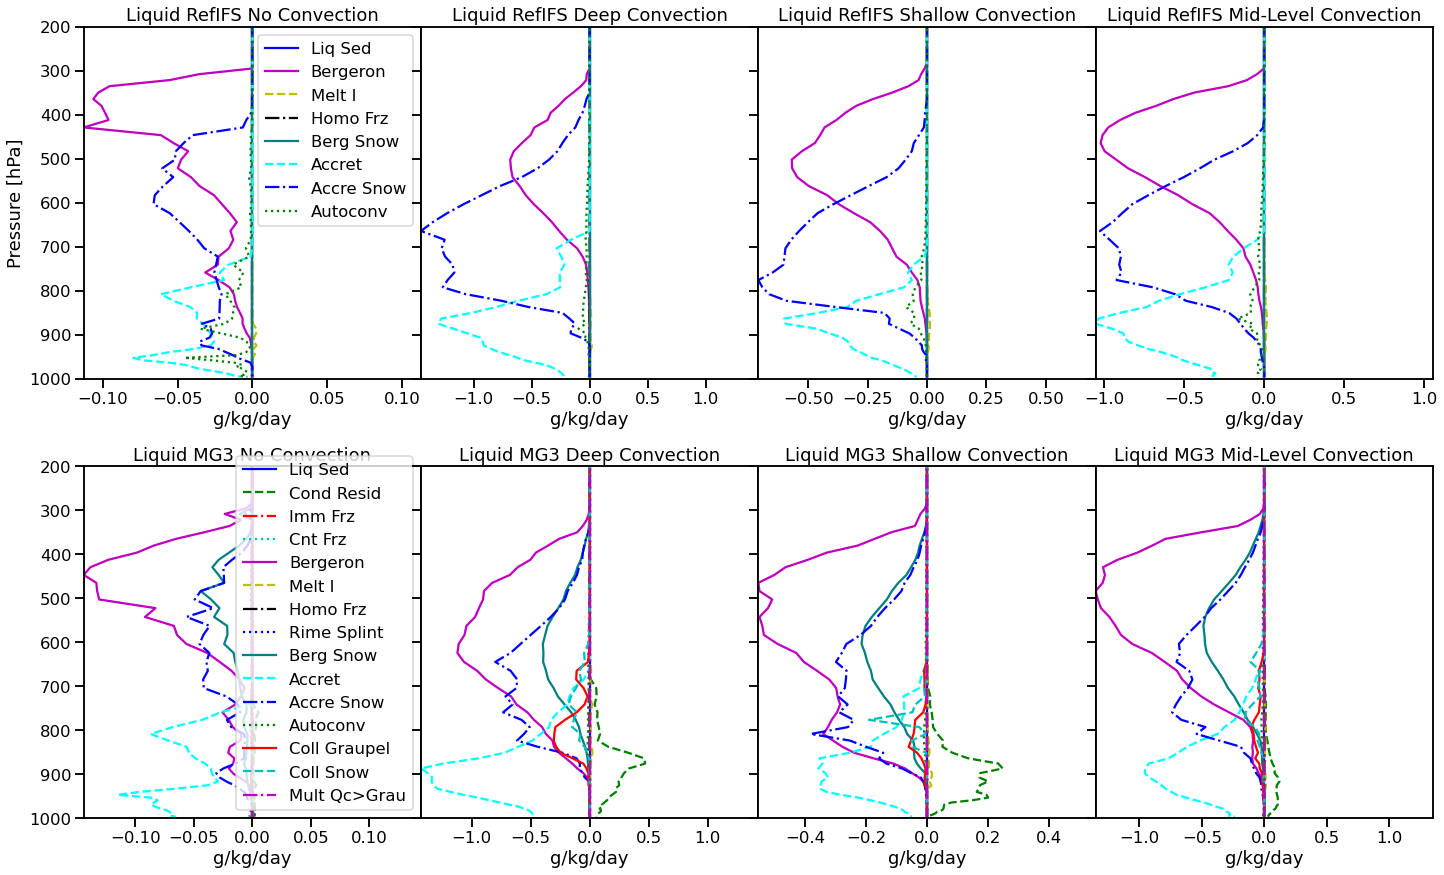

In [135]:

#vertical plots
sns.set_context("talk")  #paper, talk, poster

fig,axs=plt.subplots(nrows=2,ncols=4,sharey=True,gridspec_kw={'wspace':0},
                    figsize=[20,12])
fig.tight_layout()

axs[0,0].set_ylim(yrg)
axs[0,0].set_ylabel('Pressure [hPa]')

# Convective Type

# First Run
for c in np.arange(4):
    tmp=0.
    gg=np.where(ct1==c)[0]
    for v in range(nv1):
        if (vars1[v]!= 'tend2_'):
            v1=ds1[vars1[v]]
            v1m=v1[gg,:].mean(dim='time')
            axs[0,c].plot(v1m*varc1[v]*scl,press/100.,linestyle=lns[v],label=varn1[v],color=cls[v])

#Dynamic x range
            tmp1=np.abs(v1m).max()
            if tmp1 > tmp:
               tmp = tmp1
    xrg=np.array([-tmp,tmp])*scl*secdy
        
    tl=setn+' '+text1+' '+ctyptxt[c]
    
    axs[0,c].set_ylim(yrg)
    axs[0,c].set_xlim(xrg)
    axs[0,c].set_title(tl)
    axs[0,c].set_xlabel(xtl)

axs[0,0].legend()

# Second Run

for c in np.arange(4):
    tmp=0.
    gg=np.where(ct2==c)[0]
    for v in range(nv2):
        if (vars2[v]!= 'tend2_'):
            v2=ds2[vars2[v]]
            v2m=v2[gg,:].mean(dim='time')
            axs[1,c].plot(v2m*varc2[v]*scl,press/100.,linestyle=lns[v],label=varn2[v],color=cls[v])

#Dynamic x range
            tmp2=np.abs(v2m).max()
            if tmp2 > tmp:
               tmp = tmp2
    xrg=np.array([-tmp,tmp])*scl*secdy
        
    tl=setn+' '+text2+' '+ctyptxt[c]
    
    axs[1,c].set_ylim(yrg)
    axs[1,c].set_xlim(xrg)
    axs[1,c].set_title(tl)
    axs[1,c].set_xlabel(xtl)

axs[1,0].legend()
plt.subplots_adjust(hspace=0.25)
if figsav:
    plt.savefig('S22-T8_'+iopn+'_'+setn+'_convsort_profile.pdf')

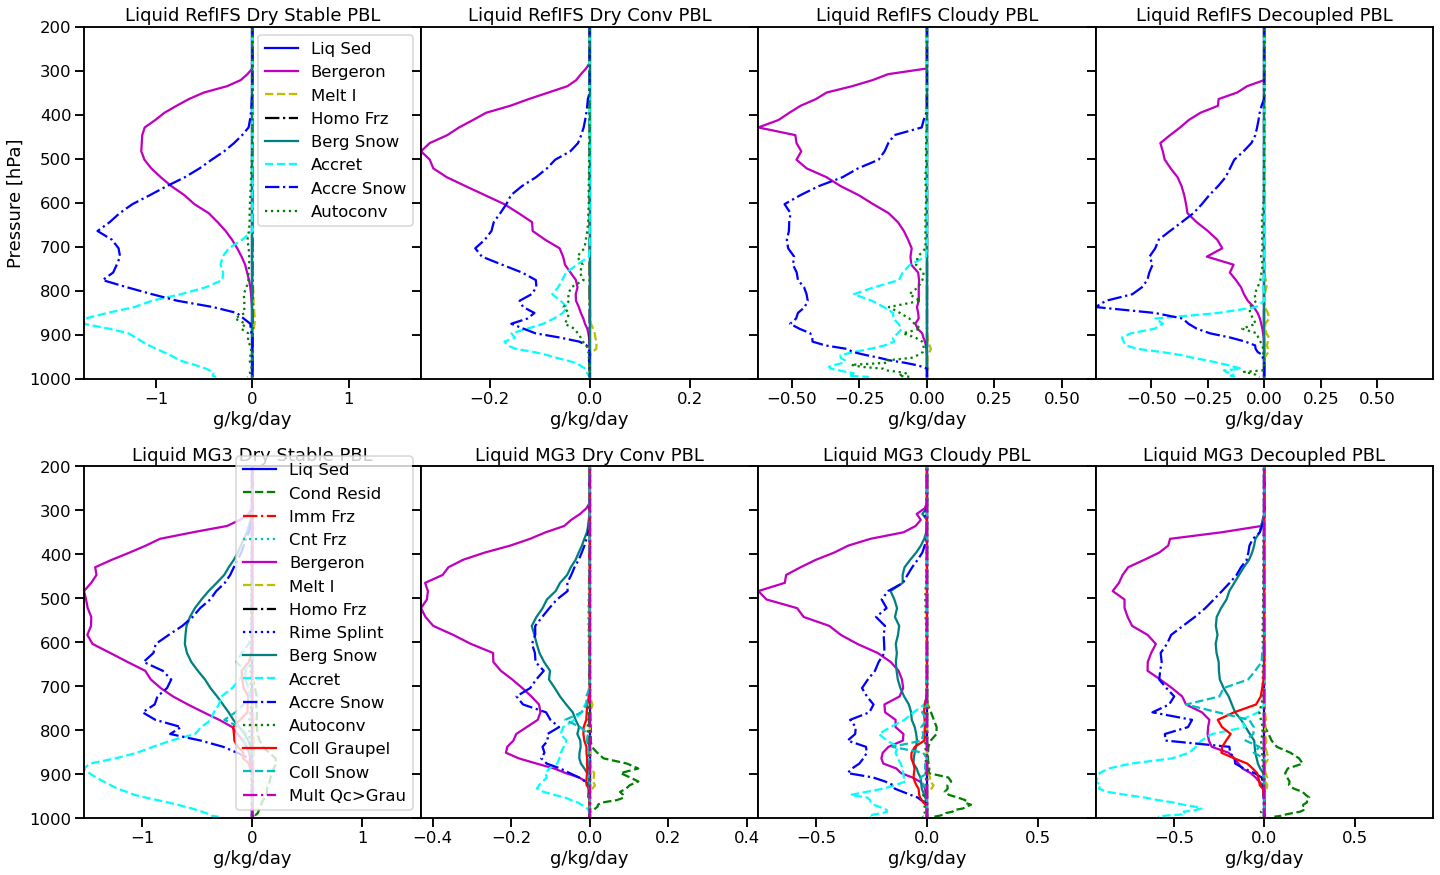

In [136]:
#vertical plots
sns.set_context("talk")  #paper, talk, poster

fig,axs=plt.subplots(nrows=2,ncols=4,sharey=True,gridspec_kw={'wspace':0},
                    figsize=[20,12])
fig.tight_layout()

axs[0,0].set_ylim(yrg)
axs[0,0].set_ylabel('Pressure [hPa]')

# PBL Type

# First Run
for c in np.arange(4):
    tmp=0.
    gg=np.where(pblt1==c)[0]
    for v in range(nv1):
        if (vars1[v]!= 'tend2_'):
            v1=ds1[vars1[v]]
            v1m=v1[gg,:].mean(dim='time')
            axs[0,c].plot(v1m*varc1[v]*scl,press/100.,linestyle=lns[v],label=varn1[v],color=cls[v])
#Dynamic x range....
            tmp1=np.abs(v1m).max()
            if tmp1 > tmp:
               tmp = tmp1
    xrg=np.array([-tmp,tmp])*scl*secdy
 
        
    tl=setn+' '+text1+' '+ptyptxt[c]
    
    axs[0,c].set_ylim(yrg)
    axs[0,c].set_xlim(xrg)
    axs[0,c].set_title(tl)
    axs[0,c].set_xlabel(xtl)

axs[0,0].legend()

# Second Run

for c in np.arange(4):
    tmp=0.
    gg=np.where(pblt2==c)[0]
    for v in range(nv2):
        if (vars2[v]!= 'tend2_'):
            v2=ds2[vars2[v]]
            v2m=v2[gg,:].mean(dim='time')
            axs[1,c].plot(v2m*varc2[v]*scl,press/100.,linestyle=lns[v],label=varn2[v],color=cls[v])

#Dynamic x range
            tmp2=np.abs(v2m).max()
            if tmp2 > tmp:
               tmp = tmp2
    xrg=np.array([-tmp,tmp])*scl*secdy
 
        
    tl=setn+' '+text2+' '+ptyptxt[c]
    
    axs[1,c].set_ylim(yrg)
    axs[1,c].set_xlim(xrg)
    axs[1,c].set_title(tl)
    axs[1,c].set_xlabel(xtl)

axs[1,0].legend()
plt.subplots_adjust(hspace=0.25)
if figsav:
    plt.savefig('S22-T8_'+iopn+'_'+setn+'_pblsort_profile.pdf')

### 3 panel plots of process rates

In [167]:
#tmp=ds2.MELTSTOT.mean(dim='time')*10.
#tmp.plot(label='MG3')
#ds1.tend2_qrqs_melt.mean(dim='time').plot(label='IFS')

v=10

varc1[v]*scl


-86400000.0

Text(0.5, 140.5, 'Melt Qs kg/kg/s')

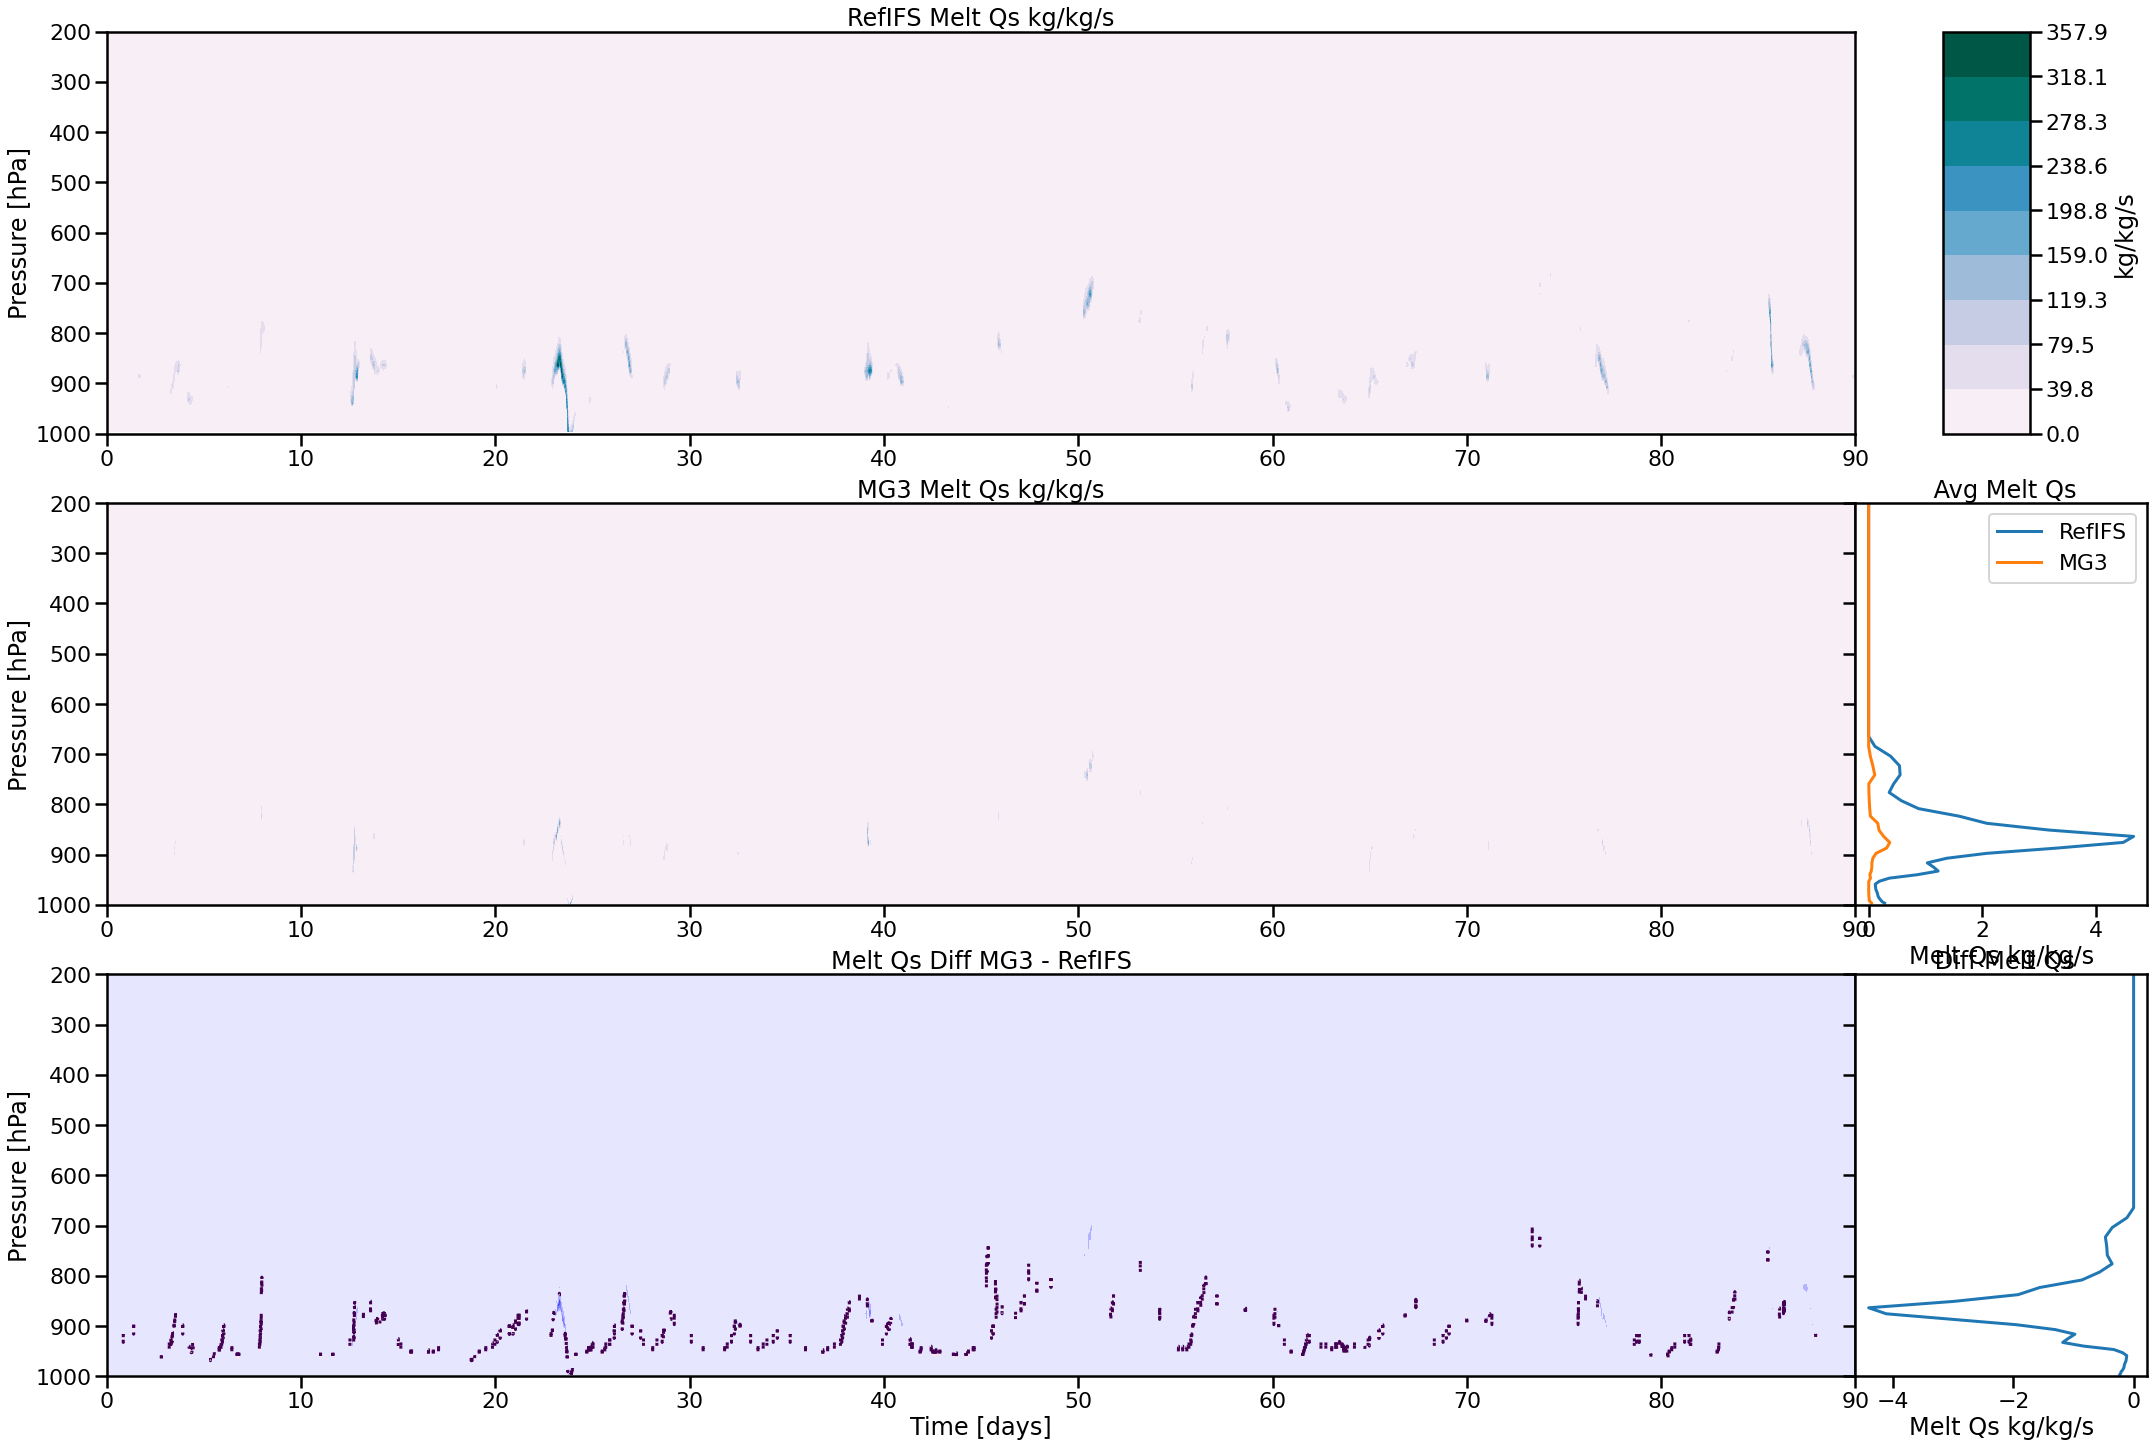

In [189]:
#plot vertical two plots...
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sns.set_context("poster")
fig,axs=plt.subplots(nrows=3,ncols=2,sharey=True,gridspec_kw={'wspace':0, 'width_ratios':[6,1]},
                    figsize=[30,20])

fig.tight_layout()


#v=10 for snow is melting.

scl=-1.*scl

v=10
varut=mgvaru
var1=ds1[vars1[v]]*varc1[v]*scl

td=ds1.time.values.astype('float')/86400.

nl=10
dl=(var1.max()-var1.min())/float(nl-1)
lvs=np.arange(nl,dtype='float')*dl.values + var1.min().values

casetx1=text1
casetx2=text2

varname=mgvarn[v]
varm=mgvarn[v]

cc='PuBuGn'

cm=axs[0,0].contourf(td,press/100.,var1.transpose(),lvs,cmap=cc)
axs[0,0].set_ylim(yrg)
axs[0,0].set_title(casetx1+' '+varname+' '+varut[v])
axs[0,0].set_ylabel('Pressure [hPa]')
#axs[0,0].set_xlabel('Time [days]')

#add a color bar (use inset axes)
axins = inset_axes(axs[0,0],
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axs[0,0].transAxes,
                   borderpad=0,
                   )
cbar=plt.colorbar(cm,cax=axins) #orientation='horizontal')
cbar.set_label(varut[v])

var2=ds2[vars2[v]]*varc2[v]*scl

dl2=(var2.max()-var2.min())/float(nl-1)
lvs2=np.arange(nl,dtype='float')*dl2.values + var2.min().values

axs[1,0].contourf(td,press/100.,var2.transpose(),lvs,cmap=cc)
axs[1,0].set_ylim(yrg)
axs[1,0].set_title(casetx2+' '+varname+' '+varut[v])
axs[1,0].set_ylabel('Pressure [hPa]')
#axs[1,0].set_xlabel('Time [days]')

axs[0,1].axis('off')
#Make vertical average and plot  y='lev' swaps axes, label sets up legend
v1m=var1.mean(dim='time')
v2m=var2.mean(dim='time')
#v0m=ds0[varm].mean(dim='time')*86400.
#v0m=(ds0['QRS'].mean(dim='time')+ds0['QRL'].mean(dim='time'))*86400.
axs[1,1].plot(v1m,press/100.,label=casetx1)
axs[1,1].plot(v2m,press/100.,label=casetx2)

#v0m.plot(y='lev',yincrease=False)
#Add title
axs[1,1].set_title(' Avg '+varname)
axs[1,1].set_ylim(yrg)
#plt.ylabel('Pressure [hPa]')
axs[1,1].set_xlabel(varm+' '+varut[v])
axs[1,1].legend()
#plt.gca().set_yscale('log')

# Difference plot
diff = var2
diff.values = diff.values - var1.values

#Levels
nl=10
dl=2*np.abs(diff).max()/float(nl)
dlvs=np.arange(nl+1,dtype='float')-nl/2.
dlvs=dlvs*dl.values

axs[2,0].contourf(td,press/100.,diff.transpose(),dlvs,cmap='bwr')
axs[2,0].contour(td,press/100.,diff.transpose(),[0.],linestyles='dotted')
axs[2,0].set_ylim(yrg)
axs[2,0].set_title(varname+' Diff '+casetx2+' - '+casetx1)
axs[2,0].set_ylabel('Pressure [hPa]')
axs[2,0].set_xlabel('Time [days]')

#Time avg diff
vdiff=diff.mean(dim='time')
axs[2,1].plot(vdiff,press/100.)
axs[2,1].set_title(' Diff '+varname)
axs[2,1].set_ylim(yrg)
#plt.ylabel('Pressure [hPa]')
axs[2,1].set_xlabel(varm+' '+varut[v])

#plt.savefig('S22-T8_cldf_ts.pdf')